In [2]:
import os
import re
import json
import sys
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

sys.path.append('..', '..')

from src.melody import Melody
from src.utils import notes_to_midi, notes_and_chord_to_midi, get_chord_progressions

rcParams['figure.figsize'] = 20,10

In [18]:
import importlib
import objective_metrics


importlib.reload(objective_metrics)

<module 'objective_metrics' from '/media/manu/Data/PycharmProjects/thesis/src/objective_metrics.py'>

In [4]:
version = '1.2'
folder = f'../data/finalised/'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.csv'))]

chord_progressions = get_chord_progressions('..')

In [5]:
metrics = {}

# filepath = '../data/split_melody/Real Book/All Of Me_original.csv'

all_dfs = []

for filepath in filepaths:
    song_name = os.path.basename(filepath).replace('.csv', '')
    song_name = "".join(song_name.split(' - ')[-1])
    song_name = re.sub('\(.*\)', '', song_name).strip()
    song_name = re.sub('_[0-9]', '', song_name)
    song_name = re.sub('_original', '', song_name)
    
    print(filepath) 

    original = 'Real Book' in filepath

    df = pd.read_csv(filepath, index_col=0)
    
    df['filename'] = filepath
    df['song'] = song_name
    df['original'] = original
    
    all_dfs.append(df)

    # PCHE
    pe1 = objective_metrics.compute_piece_pitch_entropy(df, 1)
    pe4 = objective_metrics.compute_piece_pitch_entropy(df, 4)
    
    # PV
    pv4 = objective_metrics.calculate_PV(df, 4)
    
    # TS
    ts8 = objective_metrics.calculate_TS(df, 8)
    
    # CPR
    cpr2 = objective_metrics.calculate_CPR(df, 2)
    
    # ----------
    
    # DPR
    dpr12 = objective_metrics.calculate_DPR(df, 12)
    
    # GPS
    gs = objective_metrics.compute_piece_groove_similarity(df, max_pairs=np.inf)
    
    # RV
    rv4 = objective_metrics.calculate_RV(df, 4)
    
    # QR
    qr = objective_metrics.calculate_QD(df)
    
    # ----------
    
    # HC
    hc = objective_metrics.calculate_HC(df)
    
    # ----------
    
    # RN 
#     rm = objective_metrics.calculate_RM(df)
        
    metrics[filepath] = {
        'PCHE1': pe1,
        'PCHE4': pe4,
        'PV4': pv4,
        'TS8': ts8,
        'CPR2': cpr2,
        'DPR12': dpr12,       
        'GPS': gs,
        'RV4': rv4,
        'QR': qr,
        'HC': hc,
#         'RM': rm,
        'source': os.path.basename(os.path.dirname(filepath)),
        'original': original
    }
    

total_df = pd.concat(all_dfs)  

../data/finalised/csv/Jazz-Midi/Polka Dots And Moonbeams -1-.csv
../data/finalised/csv/Jazz-Midi/April In Paris -1-.csv
../data/finalised/csv/Jazz-Midi/Autumn Leaves (1) -1-.csv
../data/finalised/csv/Jazz-Midi/But Beautiful -1-.csv
../data/finalised/csv/Jazz-Midi/Dancing On The Ceiling -1-.csv
../data/finalised/csv/Jazz-Midi/East Of The Sun -1-.csv
../data/finalised/csv/Jazz-Midi/Eighty-One -1-.csv
../data/finalised/csv/Jazz-Midi/Eighty-One -2-.csv
../data/finalised/csv/Jazz-Midi/I Can't Give You Anything But Love -1-.csv
../data/finalised/csv/Jazz-Midi/I Concentrate On You -1-.csv
../data/finalised/csv/Jazz-Midi/I Should Care -1-.csv
../data/finalised/csv/Jazz-Midi/My Funny Valentine -1-.csv
../data/finalised/csv/Jazz-Midi/Night And Day -1-.csv
../data/finalised/csv/Jazz-Midi/Our Love Is Here To Stay -1-.csv
../data/finalised/csv/Jazz-Midi/People -1-.csv
../data/finalised/csv/Jazz-Midi/Secret Love -1-.csv
../data/finalised/csv/Jazz-Midi/Secret Love -2-.csv
../data/finalised/csv/Jazz-M

../data/finalised/csv/Real Book/Star Eyes -o-.csv
../data/finalised/csv/Real Book/Stella By Starlight -o-.csv
../data/finalised/csv/Real Book/Straight, No Chaser -o-.csv
../data/finalised/csv/Real Book/Summertime -o-.csv
../data/finalised/csv/Real Book/Sweet Georgia Brown -o-.csv
../data/finalised/csv/Real Book/Swingin' Shepherd Blues -o-.csv
../data/finalised/csv/Real Book/Takin' A Chance On Love -o-.csv
../data/finalised/csv/Real Book/The Duke -o-.csv
../data/finalised/csv/Real Book/The Man I Love -o-.csv
../data/finalised/csv/Real Book/The More I See You -o-.csv
../data/finalised/csv/Real Book/The Nearness Of You -o-.csv
../data/finalised/csv/Real Book/The Party's Over -o-.csv
../data/finalised/csv/Real Book/The Shadow Of Your Smile -o-.csv
../data/finalised/csv/Real Book/The Way You Look Tonight -o-.csv
../data/finalised/csv/Real Book/There Will Never Be Another You -o-.csv
../data/finalised/csv/Real Book/They Can't Take That Away From Me -o-.csv
../data/finalised/csv/Real Book/Thi

../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -13-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -2-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -3-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -4-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -5-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -6-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -7-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -8-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Impressions (2) -9-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Oleo -1-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Oleo -3-.csv
../data/finalised/csv/Weimar DB/John Coltrane - Oleo -4-.csv
../data/finalised/csv/Weimar DB/John Coltrane - So What -1-.csv
../data/finalised/csv/Weimar DB/John Coltrane - So What -2-.csv
../data/finalised/csv/Weimar DB/Lee Koni

../data/finalised/csv/Weimar DB/Miles Davis - Airegin -3-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Eighty-One -1-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Eighty-One -2-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Eighty-One -3-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Eighty-One -4-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Eighty-One -5-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Eighty-One -6-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Esp -1-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Esp -2-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Esp -4-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Esp -5-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Esp -6-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Oleo (1) -1-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Oleo (1) -2-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Oleo (2) -1-.csv
../data/finalised/csv/Weimar DB/Miles Davis - Oleo (2) -2-.csv
../dat

In [6]:
m = pd.DataFrame().from_dict(metrics).T
m

,PCHE1,PCHE4,PV4,TS8,CPR2,DPR12,GPS,RV4,QR,HC,source,original
../data/finalised/csv/Jazz-Midi/Polka Dots And Moonbeams -1-.csv,2.389513,3.09553,9.785714,0.0,0.026786,0.0,0.780466,5.0,1.0,"[1.0, 0.0, 1.0, 0.66, 1.0, 1.0, 1.0, 1.0, 1.0,...",Jazz-Midi,False
../data/finalised/csv/Jazz-Midi/April In Paris -1-.csv,2.149063,3.104193,10.0,0.010582,0.016043,0.010695,0.811786,7.137931,0.994737,"[0.0, 1.0, 0.33, 1.0, 0.0, 0.66, 1.0, 1.0, 1.0...",Jazz-Midi,False
../data/finalised/csv/Jazz-Midi/Autumn Leaves (1) -1-.csv,2.043463,2.960173,9.172414,0.046512,0.017647,0.005882,0.835475,7.103448,1.0,"[1.0, 0.66, 1.0, 0.66, 1.0, 1.0, 0.66, 1.0, 0....",Jazz-Midi,False
../data/finalised/csv/Jazz-Midi/But Beautiful -1-.csv,2.280753,3.020253,9.571429,0.016598,0.034335,0.012876,0.802778,7.071429,1.0,"[0.66, 1.0, 1.0, 0.66, 1.0, 1.0, 0.66, 1.0, 0....",Jazz-Midi,False
../data/finalised/csv/Jazz-Midi/Dancing On The Ceiling -1-.csv,2.193427,3.005598,9.535714,0.038462,0.016667,0.016667,0.824642,6.678571,1.0,"[0.66, 0.0, 0.0, 0.66, 0.0, 0.0, 1.0, 0.66, 0....",Jazz-Midi,False
...,...,...,...,...,...,...,...,...,...,...,...,...
../data/finalised/csv/Weimar DB/Wynton Marsalis - April In Paris -2-.csv,1.990979,2.968862,9.241379,0.008547,0.036199,0.031674,0.782048,7.137931,0.991489,"[0.0, 1.0, 1.0, 0.66, 0.0, 0.0, 1.0, 0.66, 1.0...",Weimar DB,False
../data/finalised/csv/Weimar DB/Zoot Sims - All The Things You Are -1-.csv,1.641212,2.710833,7.969697,0.017751,0.08,0.08,0.855192,8.909091,0.982353,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",Weimar DB,False
../data/finalised/csv/Weimar DB/Zoot Sims - Night And Day (1) -1-.csv,1.714614,2.871977,8.340909,0.013825,0.014019,0.014019,0.866289,8.704545,0.944954,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.66,...",Weimar DB,False
../data/finalised/csv/Weimar DB/Zoot Sims - Night And Day (1) -2-.csv,1.771582,2.82507,8.266667,0.021739,0.045113,0.045113,0.882576,8.3,0.942446,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.66, 1.0, 1.0,...",Weimar DB,False


In [17]:
pitch_classes = ['C','Db','D','Eb','E','F','F#','G', 'Ab', 'A', 'Bb', 'B']


total_df['pitch_class'] = (total_df['pitch'] % 12).apply([lambda x: pitch_classes[x]])

In [18]:
total_df['source'] = total_df['filename'].apply([lambda x: os.path.basename(os.path.dirname(x))])

KeyboardInterrupt: 

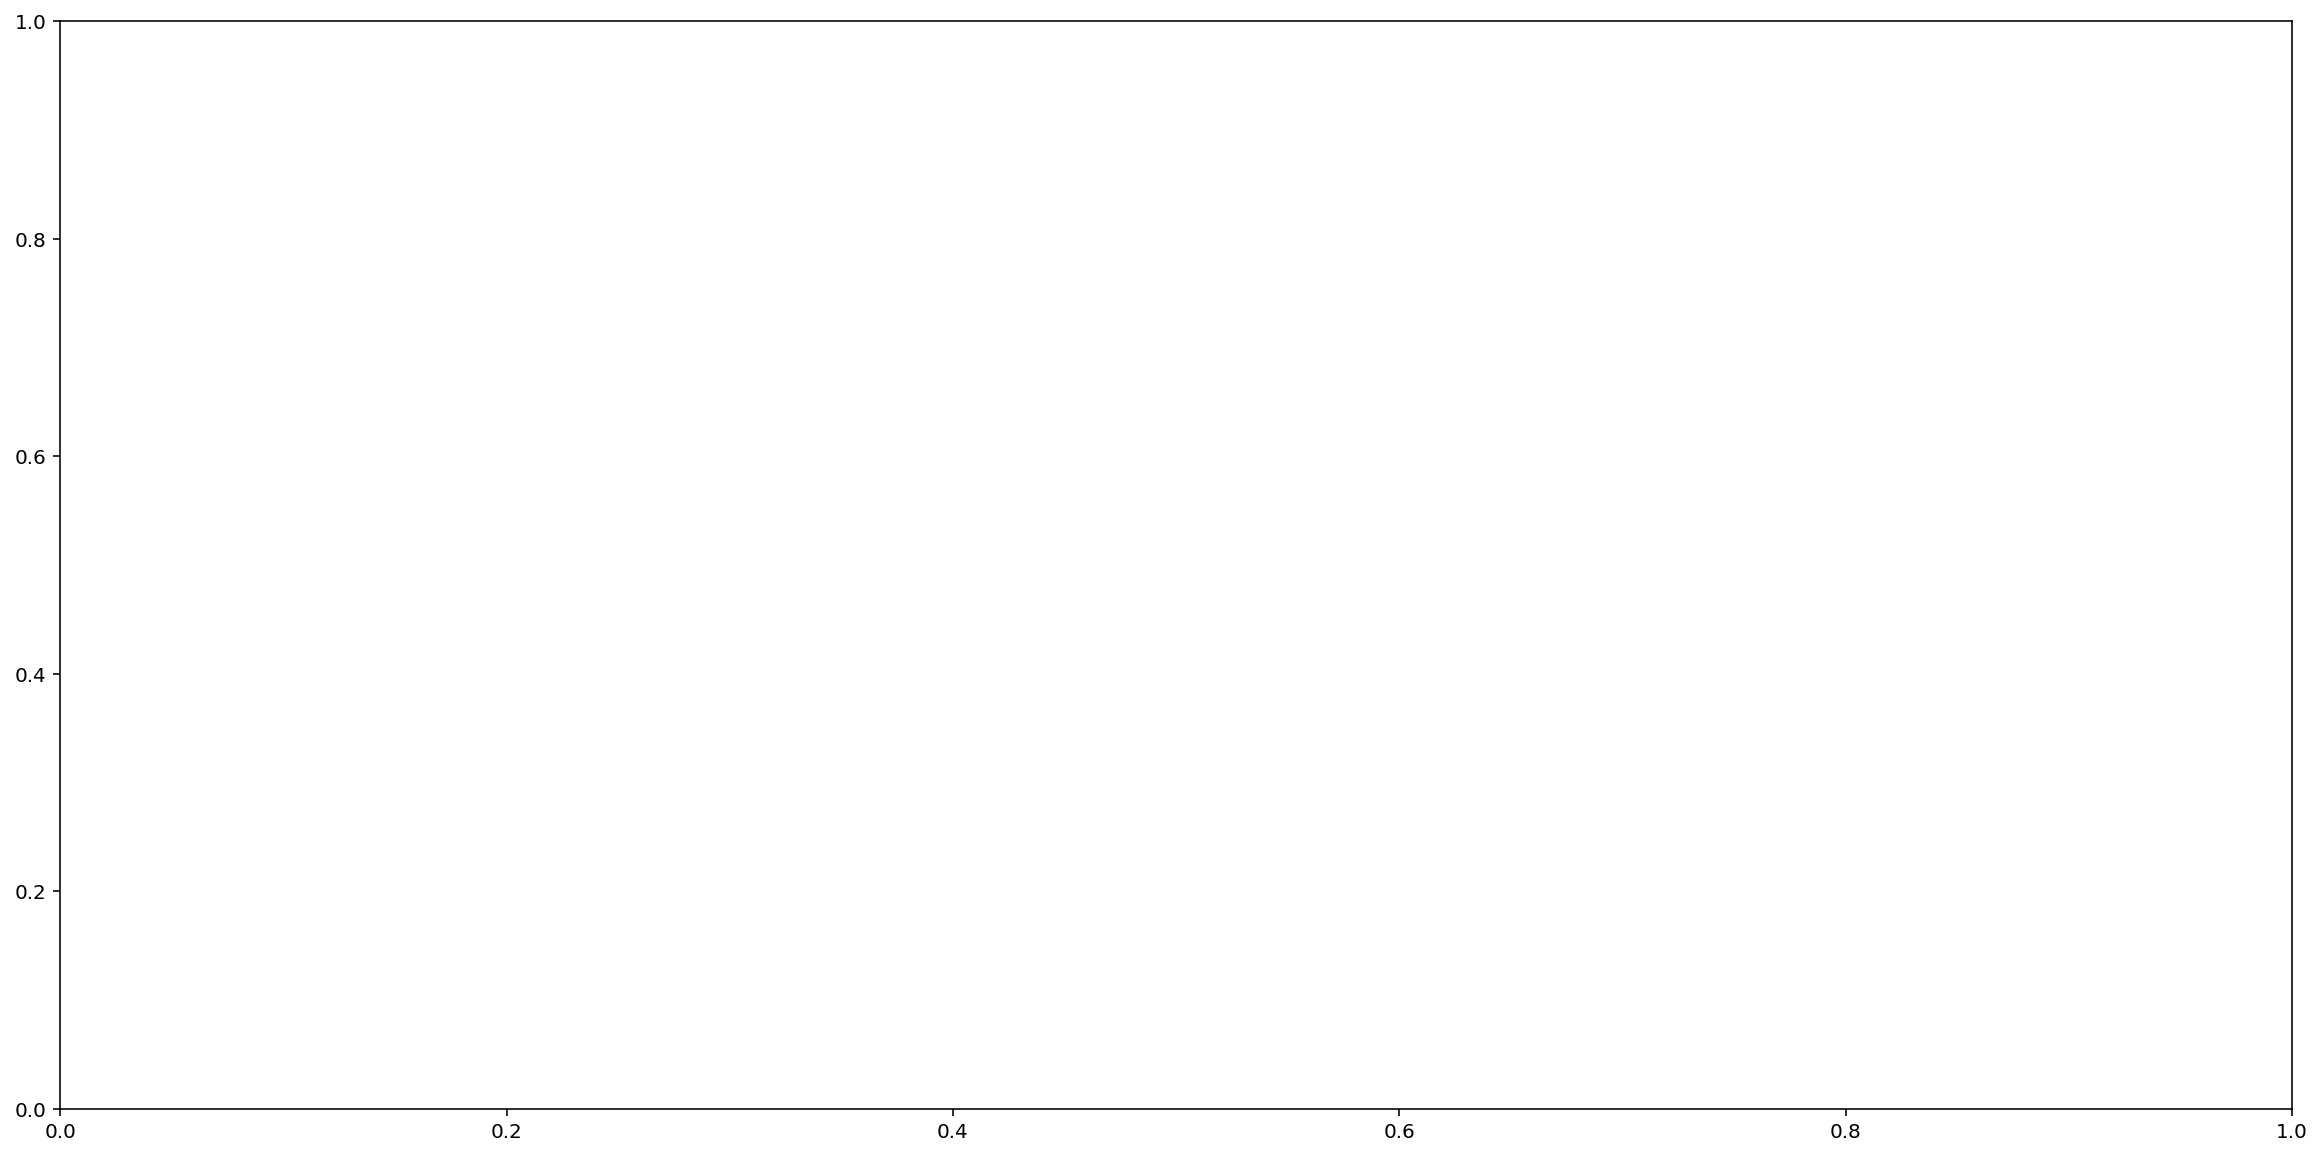

In [8]:
g = sns.countplot(
    data=total_df, 
    x='offset', hue='source',
#     kind='kde',pe1
#     stat="density", common_norm=False
)
g.set_xticks(range(0,49))

In [ ]:
g = sns.histplot(
    data=total_df[total_df['duration'] <= 48], 
    x='duration', hue='original', stat="density", common_norm=False)
g.set_xticks(range(1,49))

In [ ]:
g = sns.countplot(total_df.groupby('filename')['measure'].apply(max) + 1)
# g.set_xticks(range(0,129,4))

In [ ]:
print(
    total_df[total_df['original'] == True]['pitch'].min(),
    total_df[total_df['original'] == True]['pitch'].max()
)

In [ ]:
print(
    total_df[total_df['original'] == False]['pitch'].min(),
    total_df[total_df['original'] == False]['pitch'].max()
)

In [ ]:
g = sns.histplot(data=total_df[(total_df['pitch']<109) & (total_df['pitch']>=36)], 
                 x='pitch', 
                 hue='original',
                 stat="density", common_norm=False
                )
g.set_xticks(range(36,109))
g.set_xticklabels(pitch_classes * 6 + ['C'])

In [ ]:
g = sns.histplot(data=total_df, 
                  x='pitch_class', hue='original', 
                  stat="density", common_norm=False
 )

In [ ]:
total_df = total_df.merge(pd.DataFrame(total_df.groupby('filename').size()), how='left', left_on='filename', right_on='filename')
total_df = total_df.rename(columns={0: 'n_notes'})
print(
    total_df['n_notes'].min(),
    total_df['n_notes'].max(),
)

In [ ]:
sns.histplot(data=total_df, x='n_notes', hue='original')

In [ ]:
sns.countplot(total_df[total_df['original'] == False].groupby('song')['filename'].unique().apply(len))

In [ ]:
total_df['duration'].value_counts()

In [ ]:
import ast
import music21

context  = music21.key.Key('C')

total_df['chord_notes_triads'] = total_df['chord_notes'].apply([lambda x: str(ast.literal_eval(x)[1:4])])

In [ ]:
sns.countplot(data=total_df, x='chord_root', order=total_df['chord_root'].value_counts().index)

In [ ]:
chord_map = {}

for uc in total_df['chord_notes_triads'].unique():
    c = ast.literal_eval(uc)
    chord_map[uc] = music21.chord.Chord(c).simplifyEnharmonics(keyContext=context).pitchedCommonName
    

In [ ]:
total_df['chord_notes_triad_names'] = total_df['chord_notes_triads'].apply([lambda x: chord_map[x]])
total_df['chord_notes_triad_names'] = total_df['chord_notes_triad_names'].str.replace('triad', '').str.replace('-', ' ')

In [ ]:
sns.countplot(data=total_df, x='chord_notes_triad_names', order=total_df['chord_notes_triad_names'].value_counts().iloc[:20].index)

In [ ]:
folder = '../data/Complete Examples Melodies/Real Book'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [ ]:
stats = {}

for filepath in filepaths:
    melody = Melody(filepath)
    melody.setup()
    
    stats[melody.filepath] = {
        'key': melody.key
    }
    

In [ ]:
s = pd.DataFrame().from_dict(stats).T
s

In [ ]:
s['key_root'] = s['key'].apply(lambda x: x.tonic)
s['key_mode'] = s['key'].apply(lambda x: x.mode)
s['key_name'] = s['key'].apply(lambda x: x.name.replace('-', 'b'))

In [ ]:
sns.countplot(s['key_name'], order=s['key_name'].value_counts().index)

In [ ]:
sns.histplot(data=m, x='H1', hue='original', element="step")

In [ ]:
m[m['H4'] == 0]

In [ ]:
sns.histplot(data=m, x='H4', hue='original', element="step")

In [ ]:
sns.histplot(data=m, x='GS', hue='original', element="step")

In [ ]:
sns.histplot(data=m, x='QO', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].QO.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].QO.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='QD', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].QD.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].QD.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='CPR2', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].CPR2.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].CPR2.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='DPR12', hue='original', element="step", 
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].DPR12.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].DPR12.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='TS8', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].TS8.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].TS8.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='PV4', hue='original', element="step")
plt.axvline(x=m[m.original == True].PV4.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].PV4.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='RV4', hue='original', element="step")
plt.axvline(x=m[m.original == True].RV4.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].RV4.mean(),
            color='blue')

In [ ]:
sns.histplot(data=m, x='HC', hue='original', element="step")
plt.axvline(x=m[m.original == True].HC.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].HC.mean(),
            color='blue')

In [ ]:
m.HC.value_counts()

In [ ]:
rcParams['figure.figsize'] = 200,100

sns.displot(data=m, x='HC', kind='kde', hue='source')

In [ ]:
def get_linear_cp(cp):

    linear_chord_progression = []

    for section in cp['sections']:
        linear_chord_progression += cp['progression'][section]
    
    return objective_metrics.compute_piece_chord_progression_irregularity(
        linear_chord_progression
    )


cp_irr = [{k: get_linear_cp(v)} for k,v in chord_progressions.items()]

In [ ]:
all_cp_irr = [list(x.values())[0] for x in cp_irr]

In [ ]:
sns.displot(all_cp_irr)

In [14]:
impro = m[m['original'] == False].copy()

In [15]:
impro.columns

Index(['PCHE1', 'PCHE4', 'PV4', 'TS8', 'CPR2', 'DPR12', 'GPS', 'RV4', 'QR',
       'HC', 'source', 'original'],
      dtype='object')

In [17]:
impro['HC-m'] = impro['HC'].apply(np.mean)

for metric in ['PCHE1', 'PCHE4', 'PV4', 'TS8', 'CPR2', 'DPR12', 'GPS', 'RV4', 'QR', 'HC-m']:
    print(f'{metric} - {impro[metric].mean():5.2f} - {impro[metric].std():5.2f}')

PCHE1 -  1.97 -  0.34
PCHE4 -  2.91 -  0.26
PV4 -  8.98 -  1.43
TS8 -  0.04 -  0.08
CPR2 -  0.04 -  0.04
DPR12 -  0.02 -  0.02
GPS -  0.84 -  0.05
RV4 -  7.65 -  1.75
QR -  0.99 -  0.02
HC-m -  0.72 -  0.08
